### Create fasta files for motif enrichment analysis

Look at motif enrichment in cell type specific peaks with ubiquitous peaks as background and vice versa

Install SEA

```
module load gcc 
module load openmpi/4.1.4-gcc

wget https://meme-suite.org/meme/meme-software/5.5.5/meme-5.5.5.tar.gz
tar -xzvf meme-5.5.5.tar.gz
cd meme-5.5.5
./configure --prefix=/clusterfs/nilah/pooja/software/meme-5.5.5 --enable-build-libxml2 --enable-build-libxslt
make
make test
make install

export PATH=/clusterfs/nilah/pooja/software/meme-5.5.5/bin:/clusterfs/nilah/pooja/software/meme-5.5.5/libexec/meme-5.5.5:$PATH
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pysam
from tqdm import tqdm
from joblib import Parallel, delayed

In [2]:
root_dir = "/clusterfs/nilah/pooja"
fig_dir = f"{root_dir}/CellTypeSpecificAccessibilityPrediction/figures"

#### Loeb

In [2]:
%%bash

# create fastas from bed files
module load bedtools
peak_dir="/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
fasta="/clusterfs/nilah/pooja/genomes/hg38.ml.fa"

bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster3_Ubiquitous.bed > ${peak_dir}/cluster3_Ubiquitous.fasta
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster11_PT.bed > ${peak_dir}/cluster11_PT.fasta
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster4_DistalNephron.bed > ${peak_dir}/cluster4_DistalNephron_DT_LOH.fasta
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster9_Stroma.bed > ${peak_dir}/cluster9_Stroma.fasta

shuf -n 78639 ${peak_dir}/all_peaks_non_ubiq.bed > ${peak_dir}/all_peaks_non_ubiq_subsampled.bed
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/all_peaks_non_ubiq_subsampled.bed > ${peak_dir}/all_peaks_non_ubiq_subsampled.fasta

In [2]:
%%bash

# sample genomic background sequences
module load bedtools
peak_dir="/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
fasta="/clusterfs/nilah/pooja/genomes/hg38.ml.fa"
genome="/clusterfs/nilah/pooja/genomes/human.hg38.genome"

bedtools random -l 500 -n 50000 -seed 42 -g ${genome} > ${peak_dir}/random_genomic_background_seqs.bed
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/random_genomic_background_seqs.bed > ${peak_dir}/random_genomic_background_seqs.fasta

WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (KI270581.1) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chrom

In [1]:
%%bash

# run motif enrichment with SEA with genomic background seqs
export PATH=/clusterfs/nilah/pooja/software/meme-5.5.5/bin:/clusterfs/nilah/pooja/software/meme-5.5.5/libexec/meme-5.5.5:$PATH

peak_dir="/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
motif_file="/global/scratch/users/poojakathail/motif_databases/JASPAR/JASPAR2022_CORE_vertebrates_non-redundant_v2.meme"

for peak_file in cluster11_PT cluster4_DistalNephron_DT_LOH cluster9_Stroma cluster3_Ubiquitous;
do
    echo "sea --text --noseqs --n ${peak_dir}/random_genomic_background_seqs.fasta --pvalue 0.01 --p ${peak_dir}/${peak_file}.fasta --m ${motif_file} > ${peak_dir}/${peak_file}_vs_random_genomic_background_seqs_SEA_enrichment.tsv"
done

# run motif enrichment ubiq vs non-ubiq
echo "sea --text --noseqs --n ${peak_dir}/all_peaks_non_ubiq_subsampled.fasta --pvalue 0.01 --p ${peak_dir}/cluster3_Ubiquitous.fasta --m ${motif_file} > ${peak_dir}/cluster3_Ubiquitous_vs_all_peaks_non_ubiq_subsampled_SEA_enrichment.tsv"


sea --text --noseqs --n /clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11/random_genomic_background_seqs.fasta --pvalue 0.01 --p /clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11/cluster11_PT.fasta --m /global/scratch/users/poojakathail/motif_databases/JASPAR/JASPAR2022_CORE_vertebrates_non-redundant_v2.meme > /clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11/cluster11_PT_vs_random_genomic_background_seqs_SEA_enrichment.tsv
sea --text --noseqs --n /clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11/random_genomic_background_seqs.fasta --pvalue 0.01 --p /clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11/cluster4_DistalNephron_DT_LOH.fasta --m /global/scratch/users/poojakathail/motif_databases/JASPAR/JASPAR2022_CORE_vertebrates_non-redundant_v2.meme > /clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11/cluster4_DistalNephron_DT

In [ ]:
peak_dir = "/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
clusters = ["cluster3_Ubiquitous_vs_all_peaks_non_ubiq_subsampled_SEA_enrichment"]

cluster_enrichments = {}
for cluster in clusters:
    cluster_enrichments[cluster] = pd.read_csv(f"{peak_dir}/{cluster}.tsv", sep="\t", skipfooter=3)

/global/home/users/poojakathail/.local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


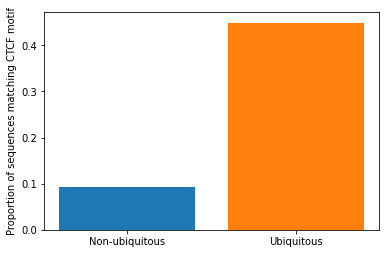

In [13]:
ctcf_motif_id = "MA1929.1"
cluster = "cluster3_Ubiquitous_vs_all_peaks_non_ubiq_subsampled_SEA_enrichment"
ctcf_results = cluster_enrichments[cluster].loc[cluster_enrichments[cluster]["ID"] == ctcf_motif_id, ["FP%", "TP%"]].iloc[0].values

plt.bar(np.arange(len(ctcf_results)), ctcf_results/100, color=["tab:blue", "tab:orange"])
plt.ylabel("Proportion of sequences matching CTCF motif")
plt.xticks(np.arange(len(ctcf_results)), ["Non-ubiquitous", "Ubiquitous"])
# plt.title("Loeb et al.")
plt.savefig(f"{fig_dir}/supp_figs/loeb_et_al_CTCF.pdf", dpi=300)

In [4]:
# identify CpG islands
peak_dir = "/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
clusters = ["all_peaks_non_ubiq_subsampled", "cluster3_Ubiquitous"]

def get_cpg_stats(seq):
    gc_content = (seq.count("G") + seq.count("C"))/len(seq)
    obs_exp_cpg = seq.count("CG")*len(seq) / (seq.count("C") * seq.count("G"))
    return gc_content, obs_exp_cpg
    

cpg_df = []
for cluster in clusters:
    print(cluster)
    
    fasta_file = pysam.FastaFile(f"{peak_dir}/{cluster}.fasta")
    seq_coords = fasta_file.references
    
    cpg_stats = Parallel(n_jobs=12)(delayed(get_cpg_stats)(fasta_file.fetch(seq_coord)) 
                       for seq_coord in seq_coords)
    cpg_df.append(pd.DataFrame({"Peak coordinates": seq_coords,
                                "Cluster": cluster,
                                "GC content": [seq_stats[0] for seq_stats in cpg_stats] ,
                                "Obs/Exp CpG":[seq_stats[1] for seq_stats in cpg_stats]}))

cpg_df = pd.concat(cpg_df)
cpg_df["CpG Island"] = (cpg_df["GC content"] >= 0.5) & (cpg_df["Obs/Exp CpG"] > 0.6)

all_peaks_non_ubiq_subsampled
cluster3_Ubiquitous


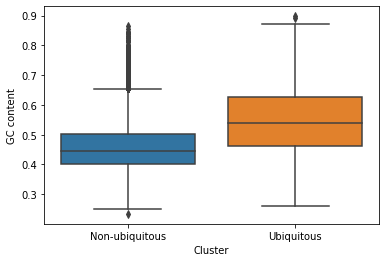

In [6]:
sns.boxplot(data=cpg_df, x="Cluster", y="GC content")
plt.xticks(np.arange(2), ["Non-ubiquitous", "Ubiquitous"])
plt.savefig(f"{fig_dir}/supp_figs/loeb_et_al_GC.pdf", dpi=300)

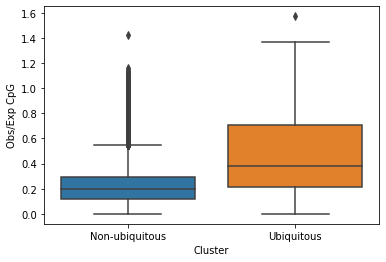

In [7]:
sns.boxplot(data=cpg_df, x="Cluster", y="Obs/Exp CpG")
plt.xticks(np.arange(2), ["Non-ubiquitous", "Ubiquitous"])
plt.savefig(f"{fig_dir}/supp_figs/loeb_et_al_CpG.pdf", dpi=300)

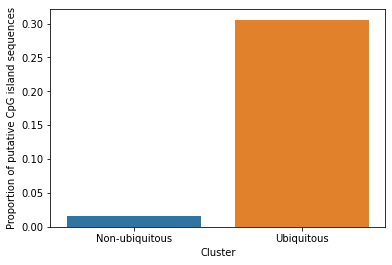

In [8]:
sns.barplot(data=cpg_df, x="Cluster", y="CpG Island", ci=0)
plt.ylabel("Proportion of putative CpG island sequences")
plt.xticks(np.arange(2), ["Non-ubiquitous", "Ubiquitous"])
plt.savefig(f"{fig_dir}/supp_figs/loeb_et_al_CpG.pdf", dpi=300)

Random genomic background seqs

In [50]:
peak_dir = "/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
clusters = ["cluster11_PT",
            "cluster4_DistalNephron_DT_LOH",
            "cluster9_Stroma",
            "cluster3_Ubiquitous"]

cluster_enrichments = {}
for cluster in clusters:
    cluster_enrichments[cluster] = pd.read_csv(f"{peak_dir}/{cluster}_vs_random_genomic_background_seqs_SEA_enrichment.tsv", sep="\t", skipfooter=3)

/global/home/users/poojakathail/.local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


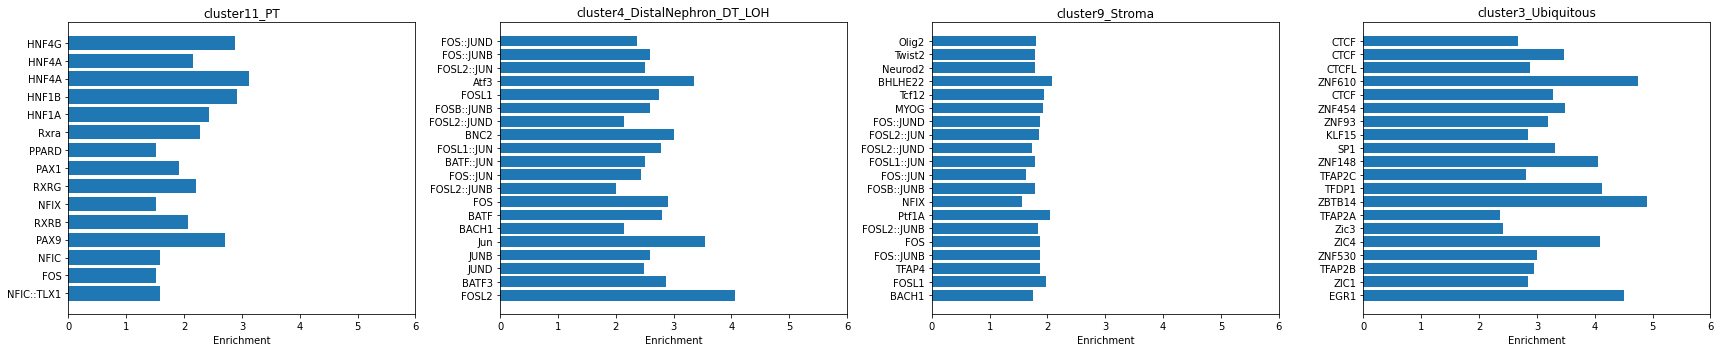

In [4]:
top_n_tfs = 20
width = 0.4
fig, ax = plt.subplots(1, 4, figsize=(24,5))

for i, cluster in enumerate(clusters):
    tmp_df = cluster_enrichments[cluster][(cluster_enrichments[cluster]["PVALUE"] < 1e-6) & 
                                                (cluster_enrichments[cluster]["TP%"] > 5) &
                                                (cluster_enrichments[cluster]["ENR_RATIO"] > 1.5)]
    if len(tmp_df) > top_n_tfs:
        tmp_df = tmp_df[:top_n_tfs]
        
    ax[i].barh(np.arange(len(tmp_df)), 
               tmp_df["ENR_RATIO"].values)
        
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 6)
    ax[i].set_xlabel("Enrichment")
    ax[i].set_title(cluster)
    ax[i].set_yticks(np.arange(len(tmp_df)))
    ax[i].set_yticklabels(tmp_df["ALT_ID"].values)
plt.tight_layout()
plt.savefig(f"merged_df = pd.DataFrame([], index=tfs, columns=clusters, dtype='float')
for cluster in clusters:
    for tf in tfs:
        enr = cluster_enrichments[cluster].loc[cluster_enrichments[cluster]["ALT_ID"] == tf, 
                                                                      "ENR_RATIO"]
        if len(enr) == 0:
            merged_df.loc[tf, cluster] = 0
        else:
            merged_df.loc[tf, cluster] = enr.values[0]     {fig_dir}/supp_figs/loeb_et_al_motif_enrichment_barplot.pdf", dpi=300)

#### Calderon

In [8]:
# resize bed intervals to 500bp (SEA motif enrichment requires background sequences to have same length distribution)
peak_dir="/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
clusters = ["cluster_open", "cluster_myeloid_resting", "cluster_nk_resting", "cluster_T_resting", "cluster_cell_type_specific"]

for cluster in clusters:
    bed_df = pd.read_csv(f"{peak_dir}/{cluster}.bed", sep="\t", names=["chr", "start", "end"])
    midpoints = bed_df["start"] + (bed_df["end"] - bed_df["start"])//2
    bed_df["start"] = midpoints - 250
    bed_df["end"] = midpoints + 250
    bed_df.to_csv(f"{peak_dir}/{cluster}_500bp.bed", sep="\t", header=False, index=False)

In [5]:
%%bash

# create fastas from bed files
module load bedtools
peak_dir="/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
fasta="/clusterfs/nilah/pooja/genomes/hg19.ml.fa"

bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster_open_500bp.bed > ${peak_dir}/cluster_open_500bp.fasta
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster_myeloid_resting_500bp.bed > ${peak_dir}/cluster_myeloid_resting_500bp.fasta
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster_nk_resting_500bp.bed > ${peak_dir}/cluster_nk_resting_500bp.fasta
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster_T_resting_500bp.bed > ${peak_dir}/cluster_T_resting_500bp.fasta
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster_cell_type_specific_500bp.bed > ${peak_dir}/cluster_cell_type_specific_500bp.fasta

shuf -n 50517 ${peak_dir}/cluster_cell_type_specific_500bp.bed > ${peak_dir}/cluster_cell_type_specific_500bp_subsampled.bed
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/cluster_cell_type_specific_500bp_subsampled.bed > ${peak_dir}/cluster_cell_type_specific_500bp_subsampled.fasta

In [3]:
%%bash

# sample genomic background sequences
module load bedtools
peak_dir="/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
fasta="/clusterfs/nilah/pooja/genomes/hg19.ml.fa"
genome="/clusterfs/nilah/pooja/genomes/human.hg19.genome"

bedtools random -l 500 -n 50000 -seed 42 -g ${genome} > ${peak_dir}/random_genomic_background_seqs.bed
bedtools getfasta -fi ${fasta} -bed ${peak_dir}/random_genomic_background_seqs.bed > ${peak_dir}/random_genomic_background_seqs.fasta

WARNING. chromosome (chr17_ctg5_hap1) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr4_ctg9_hap1) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr6_dbb_hap3) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr6_apd_hap1) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr6_apd_hap1) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr6_apd_hap1) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY) was no

In [ ]:
%%bash

# run motif enrichment with SEA with genomic background seqs
export PATH=/clusterfs/nilah/pooja/software/meme-5.5.5/bin:/clusterfs/nilah/pooja/software/meme-5.5.5/libexec/meme-5.5.5:$PATH

peak_dir="/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
motif_file="/global/scratch/users/poojakathail/motif_databases/JASPAR/JASPAR2022_CORE_vertebrates_non-redundant_v2.meme"

for peak_file in cluster_myeloid_resting_500bp cluster_nk_resting_500bp cluster_T_resting_500bp cluster_open_500bp;
do
    sea --text --noseqs --n ${peak_dir}/random_genomic_background_seqs.fasta --pvalue 0.01 --p ${peak_dir}/${peak_file}.fasta --m ${motif_file} > ${peak_dir}/${peak_file}_vs_random_genomic_background_seqs_SEA_enrichment.tsv
done

# run motif enrichment ubiq vs non-ubiq
echo "sea --text --noseqs --n ${peak_dir}/cluster_cell_type_specific_500bp_subsampled.fasta --pvalue 0.01 --p ${peak_dir}/cluster_open_500bp.fasta --m ${motif_file} > ${peak_dir}/cluster_open_500bp_vs_all_non_ubiq_cluster_cell_type_specific_500bp_subsampled_SEA_enrichment.tsv"

Look at results

In [9]:
peak_dir = "/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
clusters = ["cluster_open_500bp_vs_all_non_ubiq_cluster_cell_type_specific_500bp_subsampled_SEA_enrichment"]

cluster_enrichments = {}
for cluster in clusters:
    cluster_enrichments[cluster] = pd.read_csv(f"{peak_dir}/{cluster}.tsv", sep="\t", skipfooter=3)

/global/home/users/poojakathail/.local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


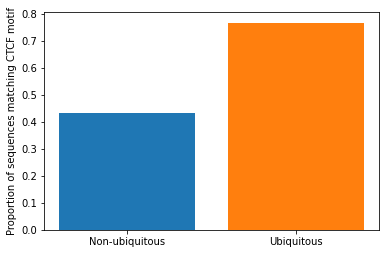

In [11]:
ctcf_motif_id = "MA1929.1"
cluster = "cluster_open_500bp_vs_all_non_ubiq_cluster_cell_type_specific_500bp_subsampled_SEA_enrichment"
ctcf_results = cluster_enrichments[cluster].loc[cluster_enrichments[cluster]["ID"] == ctcf_motif_id, ["FP%", "TP%"]].iloc[0].values

plt.bar(np.arange(len(ctcf_results)), ctcf_results/100, color=["tab:blue", "tab:orange"])
plt.ylabel("Proportion of sequences matching CTCF motif")
plt.xticks(np.arange(len(ctcf_results)), ["Non-ubiquitous", "Ubiquitous"])
# plt.title("Calderon et al.")
plt.savefig(f"{fig_dir}/supp_figs/calderon_et_al_CTCF.pdf", dpi=300)

In [13]:
# identify CpG islands
peak_dir = "/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
clusters = ["cluster_cell_type_specific_500bp_subsampled", "cluster_open_500bp"]

def get_cpg_stats(seq):
    gc_content = (seq.count("G") + seq.count("C"))/len(seq)
    obs_exp_cpg = seq.count("CG")*len(seq) / (seq.count("C") * seq.count("G"))
    return gc_content, obs_exp_cpg
    

cpg_df = []
for cluster in clusters:    
    fasta_file = pysam.FastaFile(f"{peak_dir}/{cluster}.fasta")
    seq_coords = fasta_file.references
    
    cpg_stats = Parallel(n_jobs=12)(delayed(get_cpg_stats)(fasta_file.fetch(seq_coord)) 
                       for seq_coord in seq_coords)
    cpg_df.append(pd.DataFrame({"Peak coordinates": seq_coords,
                                "Cluster": cluster,
                                "GC content": [seq_stats[0] for seq_stats in cpg_stats] ,
                                "Obs/Exp CpG":[seq_stats[1] for seq_stats in cpg_stats]}))
    
cpg_df = pd.concat(cpg_df)
cpg_df["CpG Island"] = (cpg_df["GC content"] >= 0.5) & (cpg_df["Obs/Exp CpG"] > 0.6)

cluster_cell_type_specific_500bp_subsampled
cluster_open_500bp


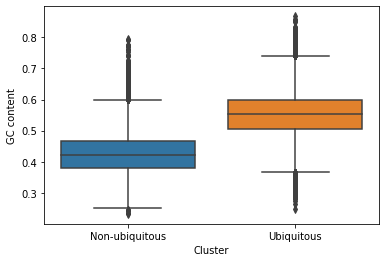

In [16]:
sns.boxplot(data=cpg_df, x="Cluster", y="GC content")
plt.xticks(np.arange(2), ["Non-ubiquitous", "Ubiquitous"])
plt.savefig(f"{fig_dir}/supp_figs/calderon_et_al_GC.pdf", dpi=300)

([<matplotlib.axis.XTick at 0x2b27972ffa10>,
 [Text(0, 0, 'Non-ubiquitous'), Text(1, 0, 'Ubiquitous')])

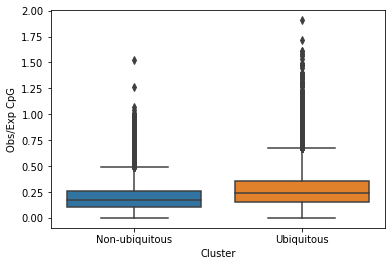

In [18]:
sns.boxplot(data=cpg_df, x="Cluster", y="Obs/Exp CpG")
plt.xticks(np.arange(2), ["Non-ubiquitous", "Ubiquitous"])

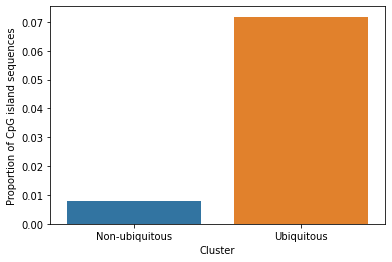

In [17]:
sns.barplot(data=cpg_df, x="Cluster", y="CpG Island", ci=0)
plt.ylabel("Proportion of CpG island sequences")
plt.xticks(np.arange(2), ["Non-ubiquitous", "Ubiquitous"])
plt.savefig(f"{fig_dir}/supp_figs/calderon_et_al_CpG.pdf", dpi=300)

Random genomic background seqs

In [55]:
peak_dir = "/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
clusters = ["cluster_myeloid_resting_500bp",
            "cluster_nk_resting_500bp",
            "cluster_T_resting_500bp",
            "cluster_open_500bp"]

cluster_enrichments = {}
for cluster in clusters:
    cluster_enrichments[cluster] = pd.read_csv(f"{peak_dir}/{cluster}_vs_random_genomic_background_seqs_SEA_enrichment.tsv", sep="\t", skipfooter=3)

/global/home/users/poojakathail/.local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


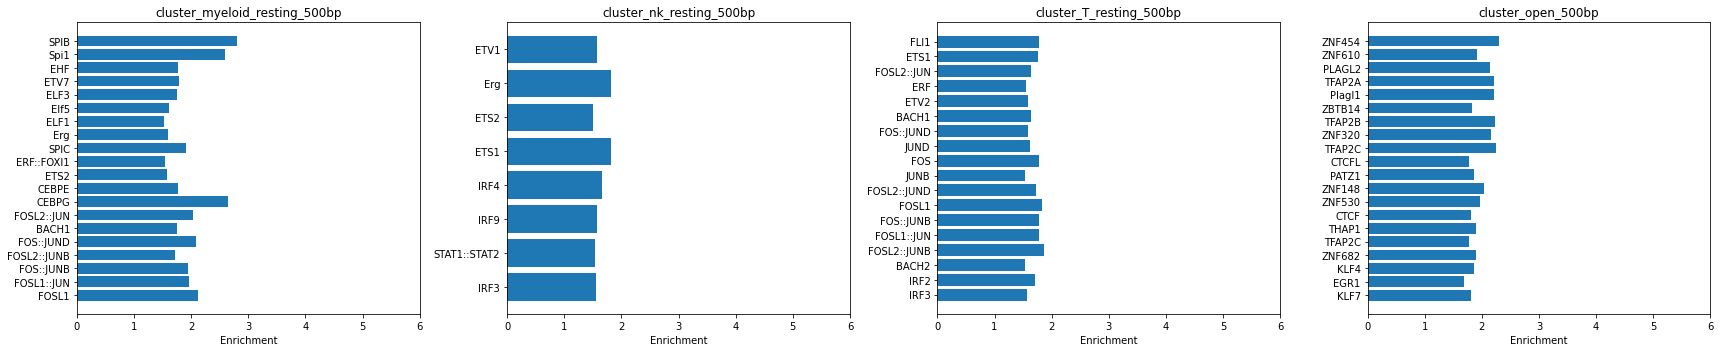

In [17]:
top_n_tfs = 20
width = 0.4
fig, ax = plt.subplots(1, 4, figsize=(24,5))

for i, cluster in enumerate(clusters):
    tmp_df = cluster_enrichments[cluster][(cluster_enrichments[cluster]["PVALUE"] < 1e-6) & 
                                                (cluster_enrichments[cluster]["TP%"] > 5) &
                                                (cluster_enrichments[cluster]["ENR_RATIO"] > 1.5)]
    if len(tmp_df) > top_n_tfs:
        tmp_df = tmp_df[:top_n_tfs]
        
    ax[i].barh(np.arange(len(tmp_df)), 
               tmp_df["ENR_RATIO"].values)
        
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 6)
    ax[i].set_xlabel("Enrichment")
    ax[i].set_title(cluster)
    ax[i].set_yticks(np.arange(len(tmp_df)))
    ax[i].set_yticklabels(tmp_df["ALT_ID"].values)
plt.tight_layout()
plt.savefig(f"{fig_dir}/supp_figs/calderon_et_al_motif_enrichment_barplot.pdf", dpi=300)